### Code attribution

* Copyright (c) Barba group
* Github page: [CFDPython](https://github.com/barbagroup/CFDPython)
* Text provided under a [Creative Commons Attribution license, CC-BY](http://creativecommons.org/licenses/by/3.0/)
* Code modified by Bjorn Sandstede under CC-BY license 

### Solving Laplace's equation
We seek the solutiuon $u(x,y)$ of Laplace's equation
$$\Delta u := \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0, \quad 0<x,y<1$$
with Dirichlet boundary conditions
$$u(x,y) = f(x,y), \qquad \mbox{for } x=0, x=1, y=0, \mbox{ or }  y=1$$
for a given function $f(x,y)$ defined on the boundary of the square $[0,1]\times[0,1]$. First, we load the necessary Python modules.

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource

Next, we define three functions. The function `jacobiIterations` solves the discretized Laplace equation using the Jacobi iteration scheme that stops when subsequent updates are sufficiently small. The function `boundaries` adjusts the updates of our iteration scheme to make sure that they satisfy the given boundary conditions. Finally, the function `graphSolution` visualizes the solution as a surface graph and a contour plot. 

In [2]:
# Define boundary conditions
def boundaries(p, f):
    p[:, 0]  = f[0]   # left side   x=0
    p[:, -1] = f[1]   # right side  x=1
    p[0, :]  = f[2]   # bottom side y=0
    p[-1, :] = f[3]   # top side    y=1
    return p

# Solve Laplace equation
def jacobiIterations(p, dx, dy, f, l1norm_target):
    l1norm = 1
    pn = np.empty_like(p)
    p = boundaries(p, f)
    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) +
                          dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) /
                          (2 * (dx**2 + dy**2)))
        p = boundaries(p, f)
        l1norm = (np.sum(np.abs(p[:]) - np.abs(pn[:])) /
                np.sum(np.abs(pn[:])))
    return p

# Plot solution
def graphSolution(u, x, y):
    X,Y = np.meshgrid(x, y)
    light = LightSource(180, 45)
    illuminated_surface = light.shade(u, cmap=cm.coolwarm)
    fig = plt.figure(figsize=(5, 10))
    ax0 = fig.add_subplot(211, projection='3d')
    ax0.plot_surface(X, Y, u, rstride=1, cstride=1, linewidth=0,
                     antialiased=False, facecolors=illuminated_surface)
    ax0.set_xlabel('x')
    ax0.set_ylabel('y')
    ax0.set_zlabel('u')
    ax0.set_title('Solution u(x,y)')
    ax0.view_init(30, 225)
    ax1 = fig.add_subplot(212)
    graph1 = ax1.imshow(u, cmap='coolwarm',  aspect='equal', origin='lower',
                        interpolation='bilinear', extent=[min(x), max(x), min(y), max(y)])
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title('Solution u(x,y)')
    ax1.set_xlim(min(x), max(x))
    ax1.set_ylim(min(y), max(y))
    fig.colorbar(graph1, ax=ax1)
    plt.tight_layout()
    plt.show()

We can now set our numerical parameters $nx$ and $ny$ that provide the number of spatial grid points we use to discretize our domain $[0,1]\times[0,1]$ in the $x$ and $y$ directions, respectively. Afterwards, we define the boundary conditions, solve the Laplace equation, and visualize the solution.

<IPython.core.display.Javascript object>


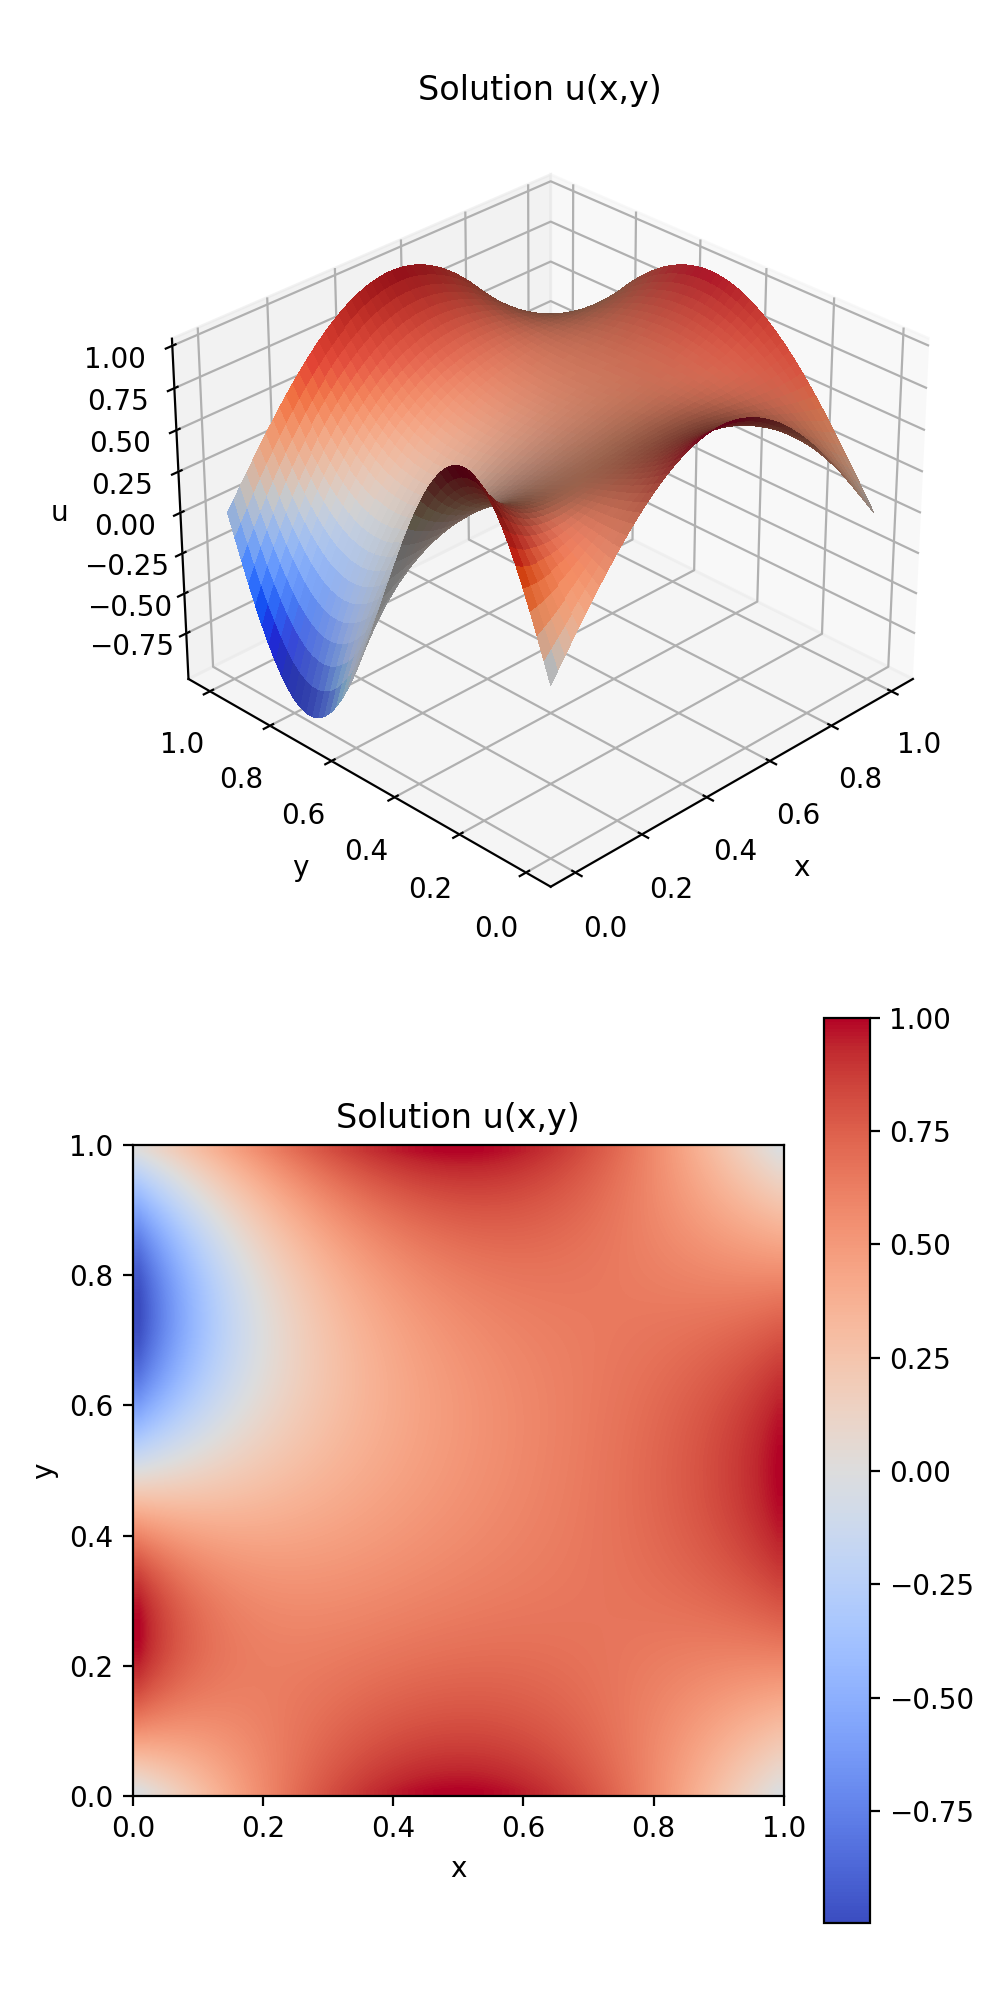

In [3]:
# Declare numerical parameters
nx = 51
ny = 51

# Define intervals
dx = 1 / (nx - 1)
dy = 1 / (ny - 1)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)

# Defines the function f(x,y) on the boundary in the order left, right, bottom, and top
f = [np.sin(2*np.pi*y), np.sin(np.pi*y), np.sin(np.pi*x), np.sin(np.pi*x)]

# Solve Laplace equation
p = np.zeros((ny, nx))
p = jacobiIterations(p, dx, dy, f, 1e-4)
graphSolution(p, x, y)